C:\Users\thaua\AppData\Local\Temp\ipykernel_48256\1544022042.py:34: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_lida, sinal_importado = wavfile.read(NOME_ARQUIVO_WAV)


Arquivo '221175__rickdenny__springbirds-2-31sec-loop.wav' lido com sucesso (Fs = 96000 Hz).
Filtro aplicado ao sinal importado.

SNR Inicial: nan dB
SNR Final: 0.00 dB
Aumento de SNR: nan dB


C:\Users\thaua\AppData\Local\Temp\ipykernel_48256\1544022042.py:83: RuntimeWarning: invalid value encountered in log10
  snr_inicial = 10 * np.log10(np.mean(sinal_importado**2) / np.mean(ruido_inicial**2))


ValueError: x and y must have same first dimension, but have shapes (1497081,) and (2994161, 2)

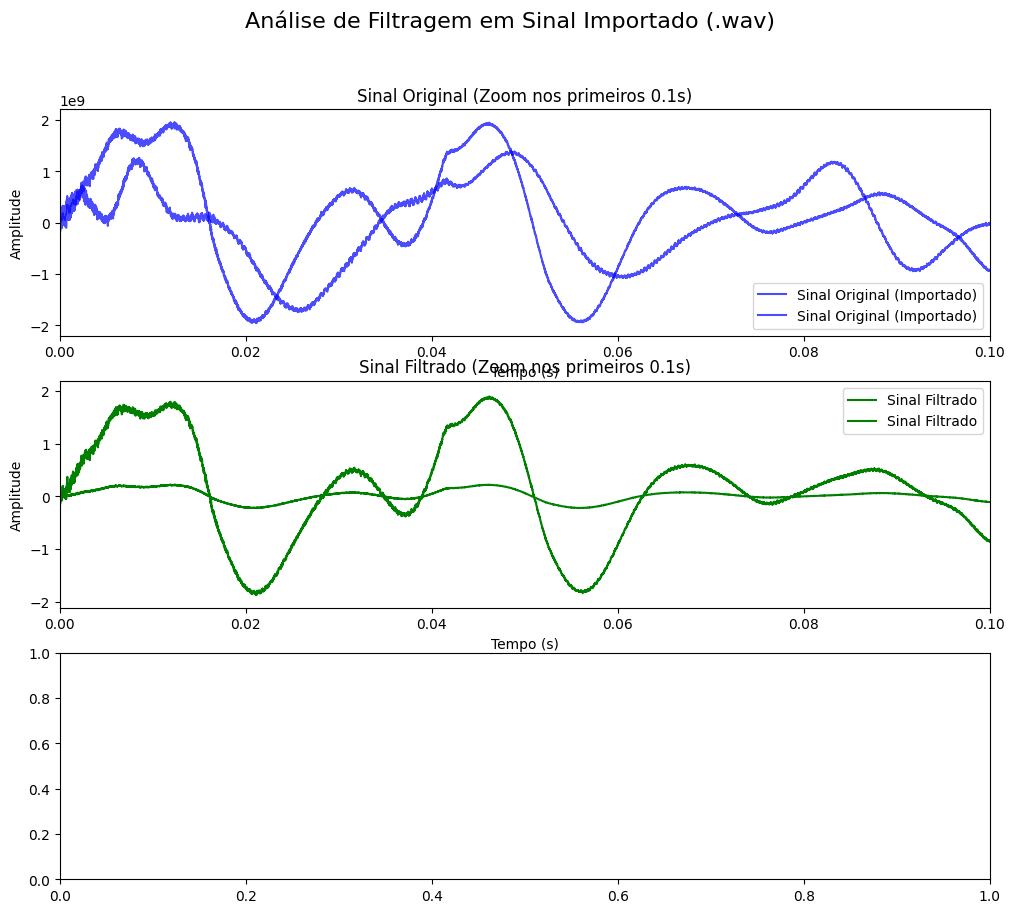

: 

In [ ]:
# -*- coding: utf-8 -*-
"""
Aula Prática: Importação, Filtragem e Audição (Versão Colab + SNR)

Fluxo:
1.  Importar arquivo .wav do ambiente Colab.
2.  Projetar um filtro digital (Passa-Baixas).
3.  Aplicar o filtro ao áudio.
4.  Visualizar o resultado (tempo + FFT).
5.  Calcular e exibir gráfico de SNR antes e depois da filtragem.
6.  Salvar e tocar os áudios no Colab.
"""
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
from IPython.display import Audio

# ==============================================================
# 1. CONFIGURAÇÃO DO ARQUIVO DE ENTRADA
# ==============================================================

NOME_ARQUIVO_WAV = "221175__rickdenny__springbirds-2-31sec-loop.wav"  # <-- Substitua pelo nome do arquivo enviado
NOME_ARQUIVO_FILTRADO = "221175__rickdenny__springbirds-2-31sec-loop_FILTRADO.wav"

# ==============================================================
# 2. IMPORTAR ÁUDIO
# ==============================================================
# Vetor de tempo


try:
    fs_lida, sinal_importado = wavfile.read(NOME_ARQUIVO_WAV)
    print(f"Arquivo '{NOME_ARQUIVO_WAV}' lido com sucesso (Fs = {fs_lida} Hz).")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{NOME_ARQUIVO_WAV}' não encontrado. Faça o upload no Colab e verifique o nome.")
    raise
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo: {e}")
    raise

duracao_lida = len(sinal_importado) / fs_lida
t_lido = np.linspace(0, duracao_lida, len(sinal_importado), endpoint=False)

# ==============================================================
# 3. PROJETO DO FILTRO (BUTTERWORTH PASSA-BAIXAS)
# ==============================================================

f_corte = 100.0  # 100 Hz, padrão para subwoofers
ordem = 4
nyquist = fs_lida / 2.0
wn_norm = f_corte / nyquist
b, a = signal.butter(ordem, wn_norm, btype='low')

# ==============================================================
# 4. APLICAR FILTRO
# ==============================================================

sinal_filtrado = signal.lfilter(b, a, sinal_importado)
print("Filtro aplicado ao sinal importado.")

# ==============================================================
# 5. FUNÇÃO PARA CALCULAR SNR
# ==============================================================

def calcular_snr(sinal_original, sinal_filtrado):
    """Calcula o SNR entre dois sinais (entrada e saída)"""
    # ruído é a diferença entre o original e o filtrado
    ruido = sinal_original - sinal_filtrado
    pot_sinal = np.mean(sinal_original.astype(float)**2)
    pot_ruido = np.mean(ruido.astype(float)**2)
    if pot_ruido == 0:
        return 100.0
    return 10 * np.log10(pot_sinal / pot_ruido)

# ==============================================================
# 6. CALCULAR SNR ANTES E DEPOIS
# ==============================================================

# SNR inicial: antes do filtro (ruído = diferença com o próprio sinal médio)
ruido_inicial = sinal_importado - np.mean(sinal_importado)
snr_inicial = 10 * np.log10(np.mean(sinal_importado**2) / np.mean(ruido_inicial**2))

# SNR final: entre sinal original e filtrado
snr_final = calcular_snr(sinal_importado, sinal_filtrado)

print(f"\nSNR Inicial: {snr_inicial:.2f} dB")
print(f"SNR Final: {snr_final:.2f} dB")
print(f"Aumento de SNR: {snr_final - snr_inicial:.2f} dB")

# ==============================================================
# 7. VISUALIZAÇÃO DOS SINAIS
# ==============================================================

plt.figure(figsize=(12, 10))
plt.suptitle("Análise de Filtragem em Sinal Importado (.wav)", fontsize=16)

# Sinal Original
plt.subplot(3, 1, 1)
plt.plot(t_lido, sinal_importado, 'b-', label='Sinal Original (Importado)', alpha=0.7)
plt.title('Sinal Original (Zoom nos primeiros 0.1s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 0.1)

# Sinal Filtrado
plt.subplot(3, 1, 2)
plt.plot(t_lido, sinal_filtrado, 'g-', label='Sinal Filtrado')
plt.title('Sinal Filtrado (Zoom nos primeiros 0.1s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 0.1)

# Espectro FFT
plt.subplot(3, 1, 3)
freqs = np.fft.rfftfreq(len(t_lido), 1/fs_lida)
fft_ruidoso = np.abs(np.fft.rfft(sinal_importado))
fft_filtrado = np.abs(np.fft.rfft(sinal_filtrado))
plt.plot(freqs, 20*np.log10(fft_ruidoso + 1e-9), 'b-', label='FFT Original', alpha=0.6)
plt.plot(freqs, 20*np.log10(fft_filtrado + 1e-9), 'g-', label='FFT Filtrado', linewidth=2)
plt.axvline(f_corte, color='k', linestyle='--', label=f'Corte ({f_corte} Hz)')
plt.title('Espectro de Frequência (FFT)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.ylim(-20, np.max(20*np.log10(fft_ruidoso + 1e-9)) + 10)
plt.xlim(0, nyquist)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ==============================================================
# 8. GRÁFICO DE SNR PADRÃO
# ==============================================================

plt.figure(figsize=(6, 5))
plt.bar(['Antes do Filtro', 'Depois do Filtro'], [snr_inicial, snr_final],
        color=['royalblue', 'seagreen'], alpha=0.8)
plt.title('Comparação do SNR (Antes x Depois)')
plt.ylabel('SNR (dB)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate([snr_inicial, snr_final]):
    plt.text(i, v + 0.5, f"{v:.2f} dB", ha='center', fontsize=10)
plt.show()

# ==============================================================
# 9. SALVAR E REPRODUZIR
# ==============================================================

max_abs_val = np.max(np.abs(sinal_filtrado))
if max_abs_val > 0:
    sinal_filtrado_norm = (sinal_filtrado / max_abs_val).astype(np.float32)
else:
    sinal_filtrado_norm = sinal_filtrado.astype(np.float32)

try:
    wavfile.write(NOME_ARQUIVO_FILTRADO, fs_lida, sinal_filtrado_norm)
    print(f"Arquivo filtrado salvo: {NOME_ARQUIVO_FILTRADO}")

    print("\nAmostra do Áudio Original:")
    display(Audio(filename=NOME_ARQUIVO_WAV))
    print("\nAmostra do Áudio Filtrado:")
    display(Audio(filename=NOME_ARQUIVO_FILTRADO))
except Exception as e:
    print(f"Erro ao salvar ou reproduzir o arquivo: {e}")

# ==============================================================
# 10. LIMPEZA OPCIONAL
# ==============================================================

"""
try:
    os.remove(NOME_ARQUIVO_FILTRADO)
    print(f"\nArquivo temporário '{NOME_ARQUIVO_FILTRADO}' removido.")
except FileNotFoundError:
    pass
"""

print("Script finalizado.")


Arquivo 'ekg.csv' lido com sucesso!
Colunas encontradas: ['Time (s)', 'Channel 1 (V)']


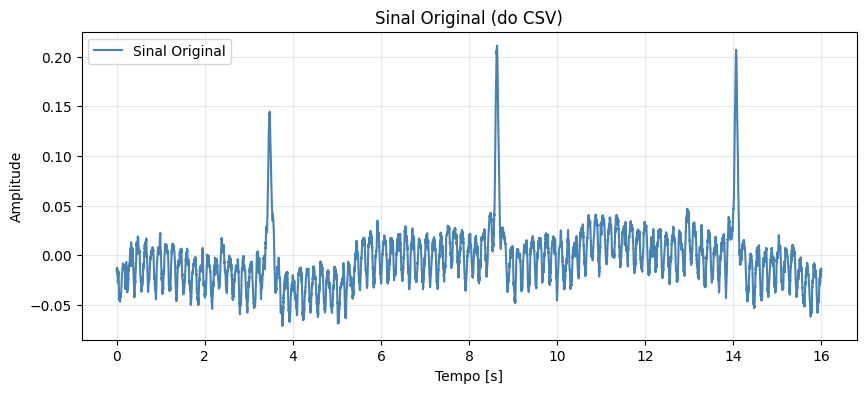

Filtro passa-baixas aplicado: 6ª ordem, corte = 10.0 Hz


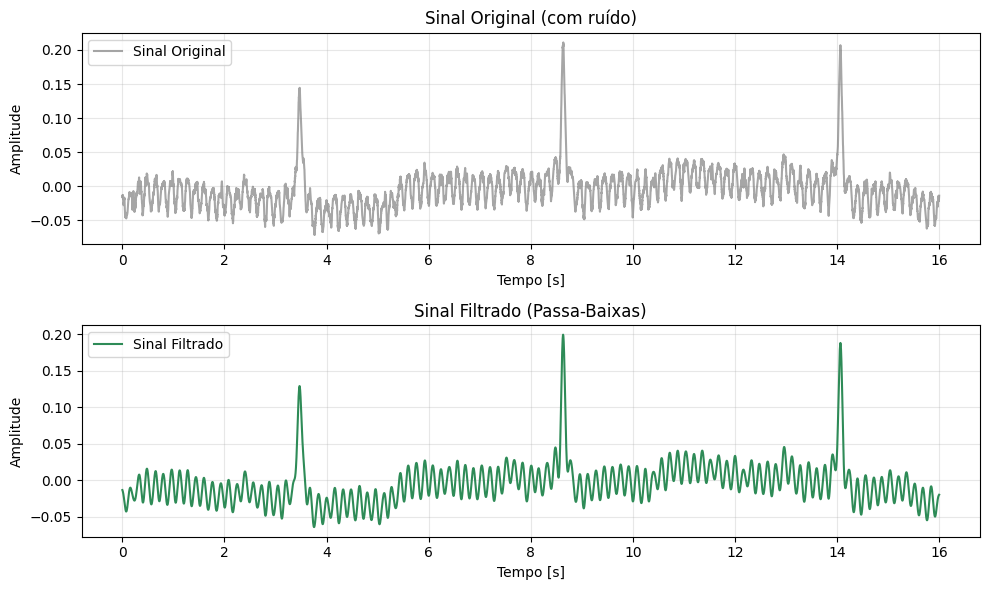

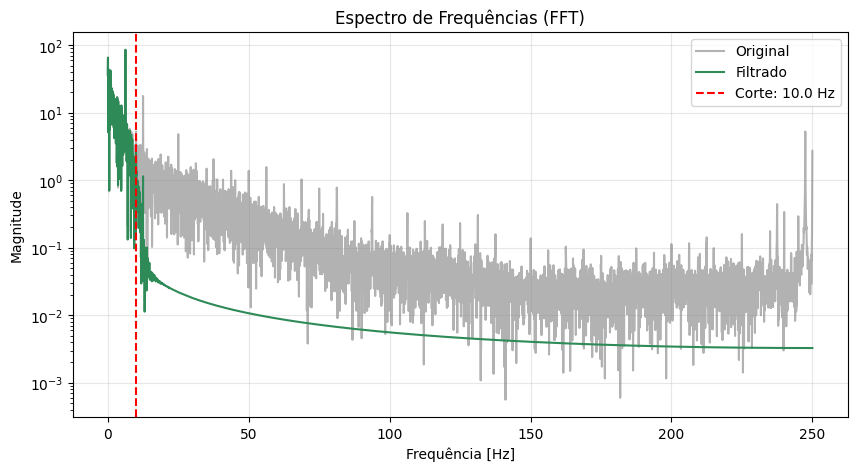


SNR Inicial: 0.10 dB
SNR Final: 15.34 dB
Ganho de SNR: 15.23 dB


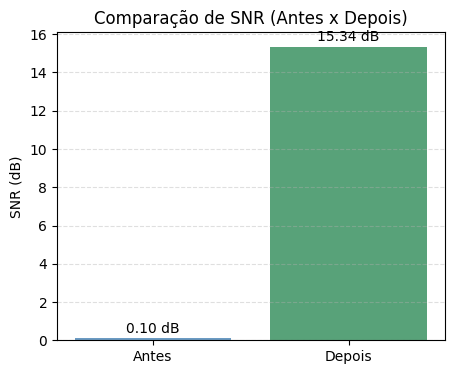

In [ ]:
# -*- coding: utf-8 -*-
"""
Aula Prática: Filtragem de Sinal a partir de CSV (Exemplo Simplificado)

Fluxo:
1. Importar o arquivo CSV contendo o sinal.
2. Visualizar o sinal bruto.
3. Projetar um filtro digital (Passa-Baixas Butterworth).
4. Aplicar o filtro ao sinal.
5. Comparar os sinais (antes e depois da filtragem).
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# ==============================================================
# 1. IMPORTAÇÃO DO CSV
# ==============================================================

NOME_ARQUIVO_CSV = "ekg.csv"  # <-- substitua se necessário

try:
    dados = pd.read_csv(NOME_ARQUIVO_CSV)
    print(f"Arquivo '{NOME_ARQUIVO_CSV}' lido com sucesso!")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{NOME_ARQUIVO_CSV}' não encontrado.")
    raise

# Supondo que há uma coluna de tempo e outra de amplitude
# Exemplo: tempo, sinal
colunas = dados.columns.tolist()
print(f"Colunas encontradas: {colunas}")

# Detecta automaticamente qual é o sinal (numérico)
sinal = dados[colunas[-1]].values  # última coluna como sinal
fs = 500  # Hz — taxa de amostragem (ajuste conforme o arquivo)
t = np.arange(len(sinal)) / fs

# ==============================================================
# 2. VISUALIZAÇÃO DO SINAL ORIGINAL
# ==============================================================

plt.figure(figsize=(10, 4))
plt.plot(t, sinal, color='steelblue', label='Sinal Original')
plt.title('Sinal Original (do CSV)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ==============================================================
# 3. PROJETO DO FILTRO (BUTTERWORTH PASSA-BAIXAS MAIS PESADO)
# ==============================================================

f_corte = 10.0  # Hz  ⟶ frequência de corte mais baixa (antes era 40 Hz)
ordem = 6       # aumenta a ordem do filtro para deixar mais seletivo
nyquist = fs / 2
wn = f_corte / nyquist
b, a = signal.butter(ordem, wn, btype='low')

# ==============================================================
# 4. APLICAÇÃO DO FILTRO
# ==============================================================

# filtfilt aplica o filtro para frente e para trás (sem atraso de fase)
sinal_filtrado = signal.filtfilt(b, a, sinal)
print(f"Filtro passa-baixas aplicado: {ordem}ª ordem, corte = {f_corte} Hz")


# ==============================================================
# 5. COMPARAÇÃO DOS RESULTADOS
# ==============================================================

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sinal, color='gray', alpha=0.7, label='Sinal Original')
plt.title('Sinal Original (com ruído)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(t, sinal_filtrado, color='seagreen', label='Sinal Filtrado')
plt.title('Sinal Filtrado (Passa-Baixas)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================
# 6. ESPECTRO DE FREQUÊNCIA
# ==============================================================

freqs = np.fft.rfftfreq(len(sinal), 1/fs)
fft_original = np.abs(np.fft.rfft(sinal))
fft_filtrado = np.abs(np.fft.rfft(sinal_filtrado))

plt.figure(figsize=(10, 5))
plt.semilogy(freqs, fft_original, color='gray', alpha=0.6, label='Original')
plt.semilogy(freqs, fft_filtrado, color='seagreen', label='Filtrado')
plt.axvline(f_corte, color='red', linestyle='--', label=f'Corte: {f_corte} Hz')
plt.title('Espectro de Frequências (FFT)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ==============================================================
# 7. COMPARAÇÃO NUMÉRICA SIMPLES (SNR)
# ==============================================================

def calcular_snr(sinal_original, sinal_filtrado):
    ruido = sinal_original - sinal_filtrado
    pot_sinal = np.mean(sinal_original.astype(float)**2)
    pot_ruido = np.mean(ruido.astype(float)**2)
    return 10 * np.log10(pot_sinal / pot_ruido)

snr_inicial = 10 * np.log10(np.mean(sinal**2) / np.mean((sinal - np.mean(sinal))**2))
snr_final = calcular_snr(sinal, sinal_filtrado)

print(f"\nSNR Inicial: {snr_inicial:.2f} dB")
print(f"SNR Final: {snr_final:.2f} dB")
print(f"Ganho de SNR: {snr_final - snr_inicial:.2f} dB")

plt.figure(figsize=(5, 4))
plt.bar(['Antes', 'Depois'], [snr_inicial, snr_final],
        color=['steelblue', 'seagreen'], alpha=0.8)
plt.title('Comparação de SNR (Antes x Depois)')
plt.ylabel('SNR (dB)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
for i, v in enumerate([snr_inicial, snr_final]):
    plt.text(i, v + 0.3, f"{v:.2f} dB", ha='center')
plt.show()
